<a href="https://colab.research.google.com/github/Seemab-zakir/Cat-and-Dog-Classification_Cnn/blob/main/Cats_and_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

In [ ]:
!kaggle competitions download -c dogs-vs-cats

In [ ]:
!unzip -q /content/dogs-vs-cats.zip

In [ ]:
!unzip -q /content/train.zip

In [ ]:
!unzip -q /content/test1.zip

In [ ]:
#train
#-cat
#-dog
#test
#-cat
#-dog

In [ ]:
!mkdir trains
!mkdir tests


In [ ]:
!mkdir trains/cats
!mkdir trains/dogs

In [ ]:
import os
import shutil
filenames = os.listdir('train')
len(filenames)

In [ ]:

for file in filenames:
  org_file=os.path.join('train',file)
  if 'cat' in org_file.lower():
    shutil.move(org_file, 'trains/cats') 
  else:
    shutil.move(org_file, 'trains/dogs') 


In [ ]:
#import libraries
import keras
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dense, Flatten, Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import ModelCheckpoint
#from keras import backend as K
from keras.optimizers import Adam,RMSprop
import tensorflow as tf
#from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
image_shape = (224,224,3)

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    rescale=1/255,
    fill_mode='nearest',
    shear_range=0.1,
    brightness_range=[0.8, 1.2],
    validation_split=0.3)

In [ ]:
train_generator = datagen.flow_from_directory('/content/trains',
    target_size=image_shape[0:2],
    batch_size=100,
    class_mode='binary',
    subset='training',
    shuffle=True)

Found 17500 images belonging to 2 classes.


In [ ]:
val_generator = datagen.flow_from_directory('/content/trains',
    target_size=image_shape[0:2],
    batch_size=50,
    class_mode='binary',
    subset='validation')

Found 7500 images belonging to 2 classes.


In [ ]:
# !mv test1 tests/

In [ ]:
test_generator = datagen.flow_from_directory('/content/tests',
    target_size=image_shape[0:2],
    batch_size=1,
    class_mode=None,
    )

Found 12500 images belonging to 1 classes.


In [ ]:
# test_generator.filenames

In [ ]:
for batch in train_generator:
     print(batch)
     break;

(array([[[[0.90196085, 0.90196085, 0.90196085],
         [0.90196085, 0.90196085, 0.90196085],
         [0.90196085, 0.90196085, 0.90196085],
         ...,
         [0.90196085, 0.87843144, 0.8862746 ],
         [0.90196085, 0.882353  , 0.8862746 ],
         [0.90196085, 0.882353  , 0.8862746 ]],

        [[0.90196085, 0.90196085, 0.90196085],
         [0.90196085, 0.90196085, 0.90196085],
         [0.90196085, 0.90196085, 0.90196085],
         ...,
         [0.8980393 , 0.8745099 , 0.8862746 ],
         [0.8941177 , 0.8705883 , 0.89019614],
         [0.89019614, 0.86274517, 0.89019614]],

        [[0.90196085, 0.90196085, 0.90196085],
         [0.90196085, 0.90196085, 0.90196085],
         [0.90196085, 0.90196085, 0.90196085],
         ...,
         [0.882353  , 0.85098046, 0.8862746 ],
         [0.8745099 , 0.8470589 , 0.87843144],
         [0.86666673, 0.83921576, 0.8705883 ]],

        ...,

        [[0.80392164, 0.7960785 , 0.83921576],
         [0.80392164, 0.7960785 , 0.83921576

In [ ]:
for batch in test_generator:
     print(batch)
     break;

[[[[0.0627451  0.07058824 0.13725491]
   [0.08235294 0.09411766 0.15294118]
   [0.1137255  0.12156864 0.18823531]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.0627451  0.07450981 0.1254902 ]
   [0.06666667 0.07450981 0.14117648]
   [0.09411766 0.10196079 0.16470589]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.07058824 0.09411766 0.12156864]
   [0.05882353 0.06666667 0.12941177]
   [0.07450981 0.08627451 0.14509805]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.14901961 0.08235294 0.06666667]
   [0.14901961 0.07450981 0.0627451 ]
   [0.14509805 0.07058824 0.05882353]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.14901961 0.07450981 0.0627451 ]
   [0.1

In [ ]:
from keras.layers import MaxPool2D
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     2

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
results = model.fit(train_generator,epochs=5,
                              validation_data=val_generator)

Epoch 1/5
175/175 [==============================] - 373s 2s/step - loss: 0.7952 - accuracy: 0.6072 - val_loss: 2.0928 - val_accuracy: 0.5000
Epoch 2/5
175/175 [==============================] - 362s 2s/step - loss: 0.6428 - accuracy: 0.6644 - val_loss: 1.2421 - val_accuracy: 0.5057
Epoch 3/5
175/175 [==============================] - 363s 2s/step - loss: 0.5914 - accuracy: 0.6925 - val_loss: 0.7853 - val_accuracy: 0.5599
Epoch 4/5
175/175 [==============================] - 363s 2s/step - loss: 0.5576 - accuracy: 0.7139 - val_loss: 0.5968 - val_accuracy: 0.6695
Epoch 5/5
175/175 [==============================] - 353s 2s/step - loss: 0.5364 - accuracy: 0.7323 - val_loss: 0.5510 - val_accuracy: 0.7185


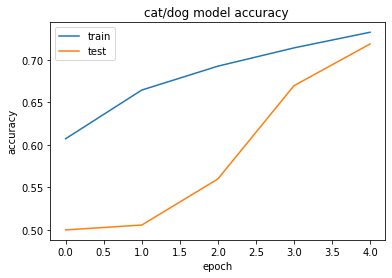

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('cat/dog model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

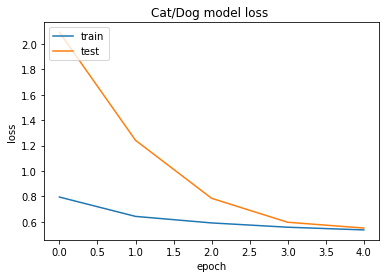

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Cat/Dog model loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_predx=model.predict(val_generator)
y_true = val_generator.classes

In [ ]:
class_names=list(val_generator.class_indices.values())
class_names

[0, 1]

In [ ]:
pred=np.where(y_predx>0.5,1,0)

In [ ]:
len(y_pred),len(y_true)

(7500, 7500)

In [ ]:
np.unique(y_pred,return_counts=True)

(array([0, 1]), array([3525, 3975]))

In [ ]:
# y_pred=np.argmax(y_pred, axis=1)
from sklearn.metrics import classification_report,accuracy_score,f1_score
print(accuracy_score(y_true,y_pred))
print(f1_score(y_true,y_pred,average='macro'))

0.5014666666666666
0.5010175824909084


In [ ]:
print(classification_report(y_true,y_pred,labels=[0,1]))


              precision    recall  f1-score   support

           0       0.50      0.47      0.49      3750
           1       0.50      0.53      0.52      3750

    accuracy                           0.50      7500
   macro avg       0.50      0.50      0.50      7500
weighted avg       0.50      0.50      0.50      7500



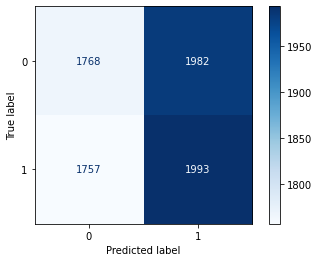

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred, labels=list(class_names))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=list(class_names))
disp.plot(cmap='Blues')
plt.show()